In [2]:
using PyCall
sklearn = pyimport("sklearn.decomposition")
using Plots;
include("../AudioNMF.jl");
using .AudioNMF

In [3]:
## This many samples will result in a V matrix of size (256)x(2^18)
subrange = 1 : (156.5175 * (2^18))
filename = "../data/water.wav"
V, = audio_to_V(filename, subrange);

In [ ]:
# k : number of components
# n : number of sequences

k_list = [16,32,64,128,256];
n_list = 2 .^[12,14,16,17,18];
compile_time = @elapsed W,H = nmf(zeros(10),2,1);
elapsed_time = zeros(length(k_list), length(n_list));

for (i_k, k) in enumerate(k_list), (i_n, n) in enumerate(n_list)
    model = sklearn.NMF(n_components=k,solver="mu",init="random",max_iter=1000,tol=0);
    elapsed_time[i_k,i_n] = @elapsed W = model.fit_transform(V[:,1:n]);
end

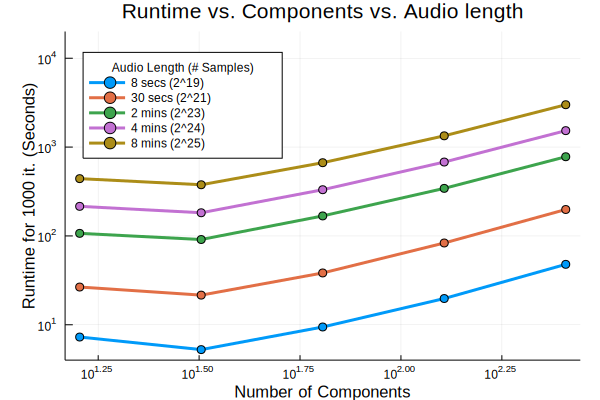

In [14]:
fig = plot(k_list, elapsed_time, markershape=:circle, xaxis=:log, yaxis=:log, legend=:topleft,
    label=["8 secs (2^19)","30 secs (2^21)","2 mins (2^23)","4 mins (2^24)","8 mins (2^25)"],lw=3,legend_title="Audio Length (# Samples)")
xlabel!(fig,"Number of Components")
ylabel!(fig,"Runtime for 1000 it. (Seconds)")
ylims!(fig,(4,20000))
title!(fig,"Runtime vs. Components vs. Audio length")

In [15]:
print("compile time: ", compile_time, "\n")
elapsed_time

compile time: 12.501788181


5×5 Array{Float64,2}:
  7.27467   26.5809  106.867    215.206   441.376
  5.25291   21.563    91.1168   182.27    376.61 
  9.44327   38.2992  167.939    331.227   667.127
 19.7414    83.2758  343.023    678.67   1339.14 
 47.8782   198.339   778.588   1531.27   2997.77 